In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(r"/content/drive/MyDrive/Civil_Service_List__Active__20250306 (1).csv")


print("Dataset Information:")
print(df.info())


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("N/A")
    else:
        df[col] = df[col].fillna(0)


cat_cols = ['List Title Desc', 'List Agency Desc', 'Group No']
for col in cat_cols:
    if col in df.columns:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467706 entries, 0 to 467705
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Exam No             467706 non-null  int64  
 1   List No             467706 non-null  float64
 2   First Name          467700 non-null  object 
 3   MI                  255405 non-null  object 
 4   Last Name           467700 non-null  object 
 5   Adj. FA             467706 non-null  float64
 6   List Title Code     467706 non-null  int64  
 7   List Title Desc     467706 non-null  object 
 8   Group No            467706 non-null  int64  
 9   List Agency Code    467706 non-null  int64  
 10  List Agency Desc    467706 non-null  object 
 11  List Div Code       0 non-null       float64
 12  Published Date      207108 non-null  object 
 13  Established Date    450195 non-null  object 
 14  Anniversary Date    450195 non-null  object 
 15  Extension Dat

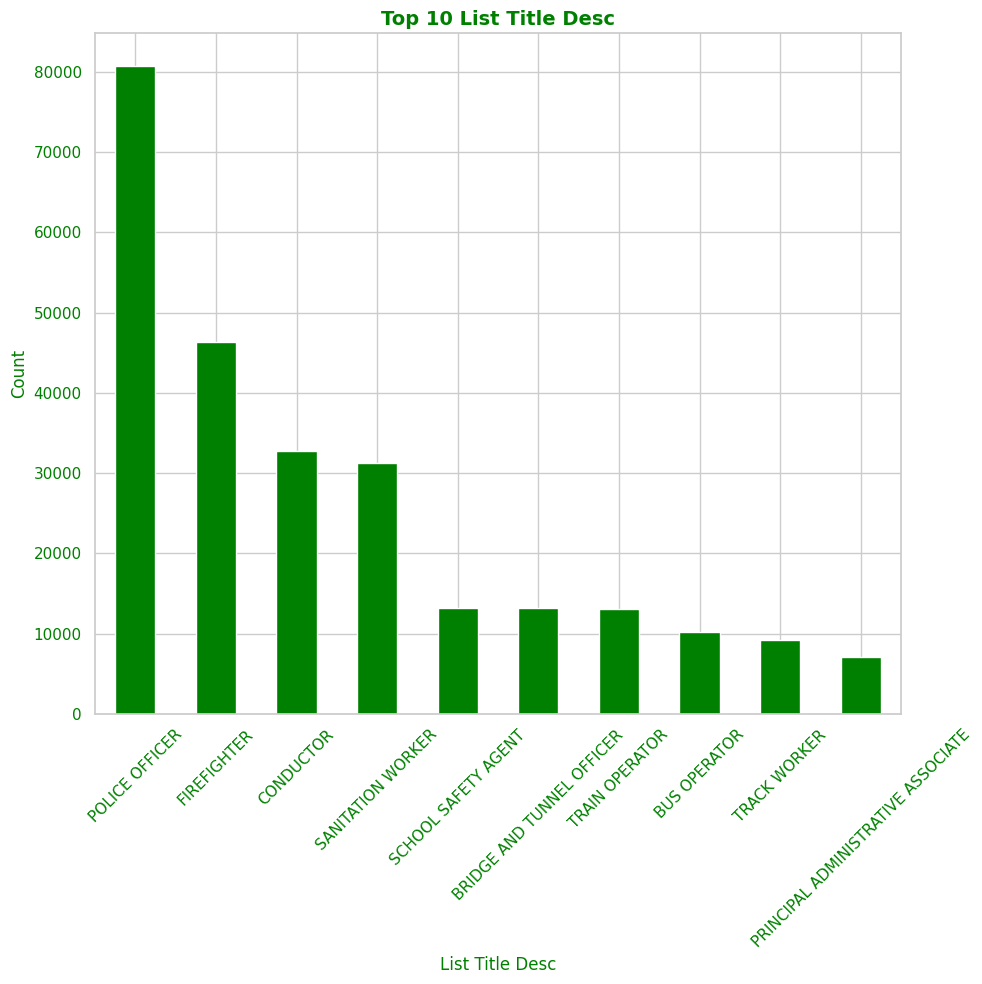

In [62]:
if 'List Title Desc' in df.columns:
    top_titles = df['List Title Desc'].value_counts().head(10)
    plt.figure(figsize=(10, 10))
    top_titles.plot(kind='bar', title='Top 10 List Title Desc',color='green')
    plt.xlabel('List Title Desc', color='green')
    plt.ylabel('Count', color='green')
    plt.title('Top 10 List Title Desc', fontsize=14, fontweight='bold',color='green')  # <- Bold title added
    plt.xticks(rotation=45,color='green')
    plt.yticks(color='green')
    plt.tight_layout()
    plt.show()


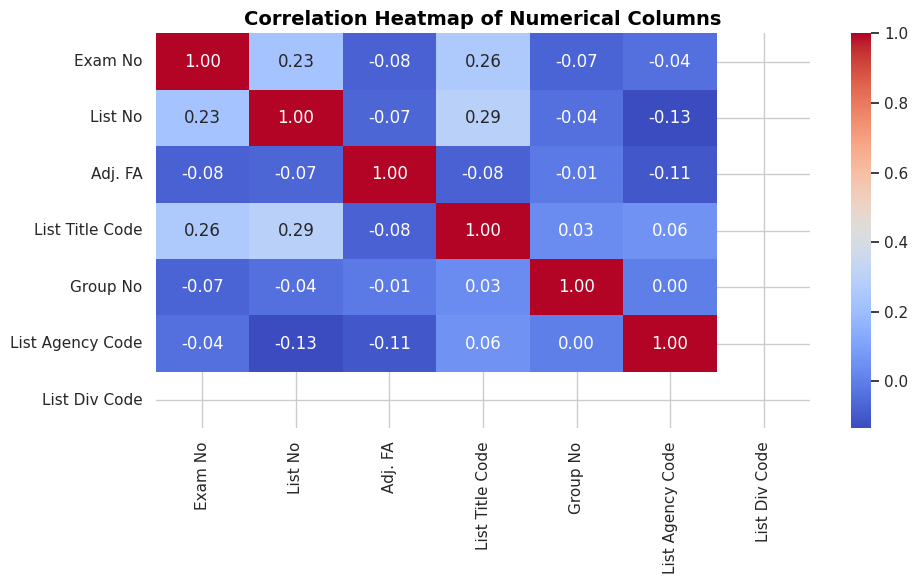


Correlation bet 'Adj. FA' and 'List No': -0.07
The columns 'Adj. FA' and 'List No' have a weak negative correlation, meaning as the value of 'Adj. FA' changes, 'List No' tends to decrease.


In [46]:
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation  of Numerical Columns',fontweight='bold',fontsize=14,color='black')
plt.tight_layout()
plt.show()


col1 = 'Adj. FA'
col2 = 'List No'
if col1 in numeric_cols.columns and col2 in numeric_cols.columns:
    corr_value = df[col1].corr(df[col2])
    print(f"\nCorrelation between '{col1}' and '{col2}': {corr_value:.2f}")
    if corr_value > 0.7:
        relation = "strong positive correlation"
    elif corr_value > 0.3:
        relation = "moderate positive correlation"
    elif corr_value > 0:
        relation = "weak positive correlation"
    elif corr_value < -0.7:
        relation = "strong negative correlation"
    elif corr_value < -0.3:
        relation = "moderate negative correlation"
    elif corr_value < 0:
        relation = "weak negative correlation"
    else:
        relation = "no correlation"
    print(f"The columns '{col1}' and '{col2}' have a {relation}, meaning as the value of '{col1}' changes, '{col2}' tends to {'increase' if corr_value > 0 else 'decrease' if corr_value < 0 else 'remain unchanged' }.")

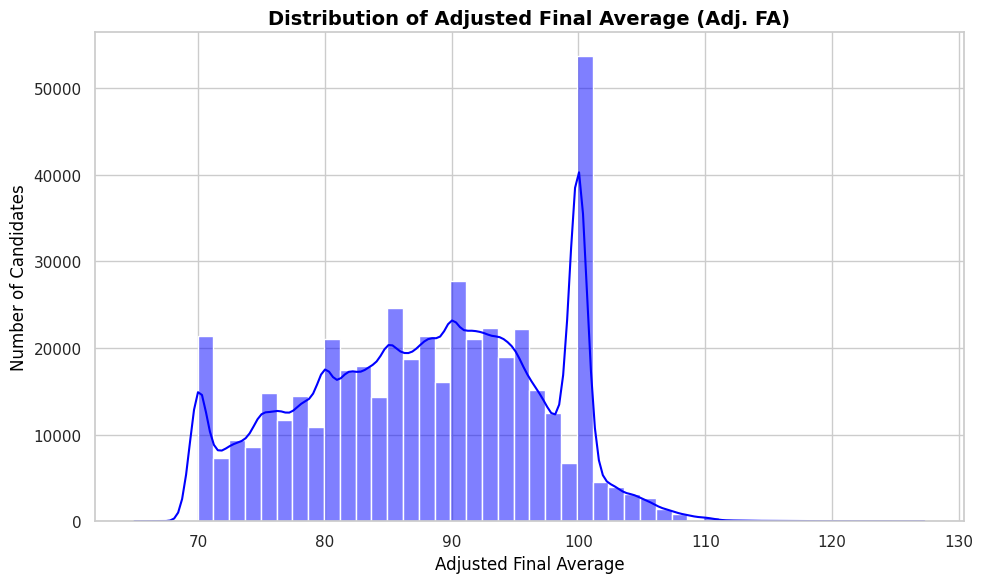

In [35]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(df['Adj. FA'], bins=50, kde=True, color='blue')
plt.title("Distribution of Adjusted Final Average (Adj. FA)",fontweight='bold',color='black',fontsize=14)
plt.xlabel("Adjusted Final Average",color='black',fontsize=12)
plt.ylabel("Number of Candidates",color='black',fontsize=12)
plt.tight_layout()
plt.show()

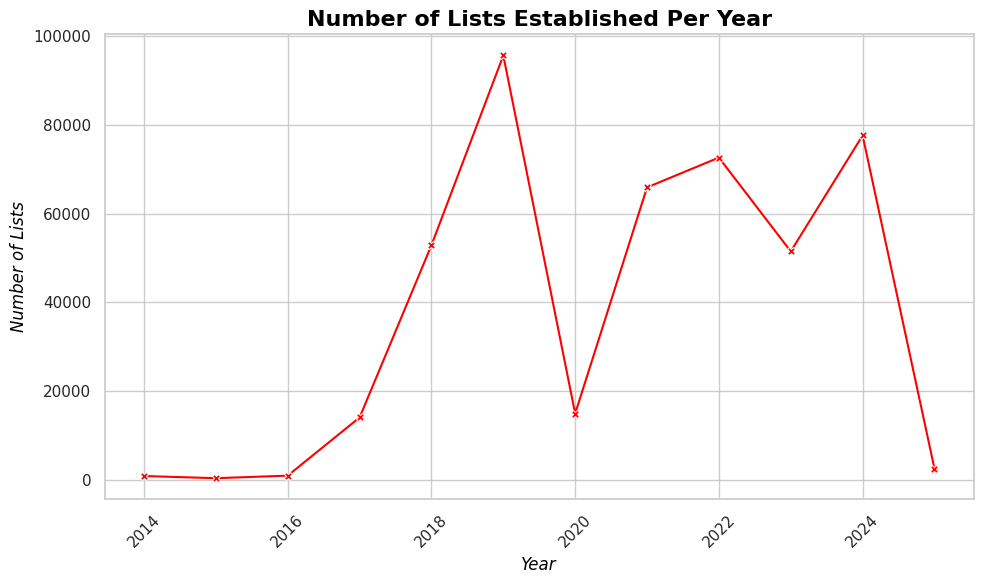

In [65]:
df['Established Date'] = pd.to_datetime(df['Established Date'], errors='coerce')


df['Established Year'] = df['Established Date'].dt.year


established_counts = df['Established Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x=established_counts.index, y=established_counts.values, marker='X', color='red')
plt.title("Number of Lists Established Per Year",fontweight='bold',color='black',fontsize=16)
plt.xlabel("Year",fontstyle='italic',color='black',fontsize=12)
plt.ylabel("Number of Lists",fontstyle='italic',color='black',fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

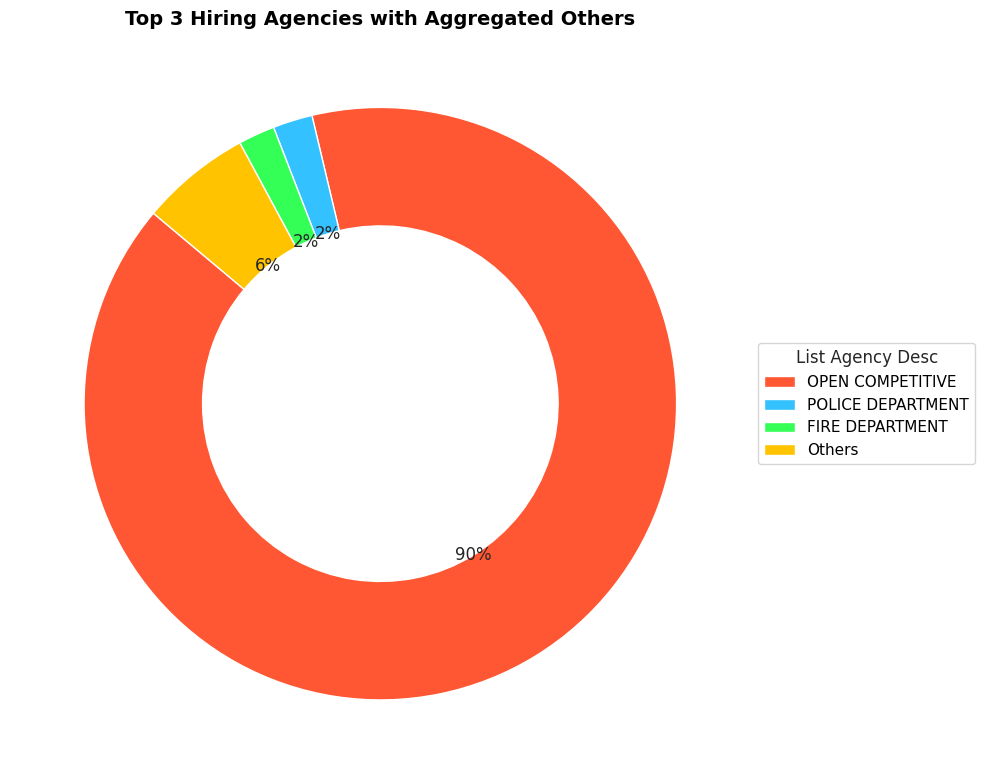

In [67]:
top_agencies = df['List Agency Desc'].value_counts().head(3)
others_count = df['List Agency Desc'].value_counts().iloc[3:].sum()

agency_data = pd.concat([top_agencies, pd.Series({'Others': others_count})])

warm_colors =  ['#FF5733', '#33C1FF', '#33FF57', '#FFC300']

plt.figure(figsize=(10, 8))
wedges, _, autotexts = plt.pie(
    agency_data,
    labels=None,
    colors=warm_colors,
    autopct='%1.f%%',
    startangle=140,
    wedgeprops={'width': 0.4}
)

legend = plt.legend(wedges, agency_data.index, title="List Agency Desc", loc="center left", bbox_to_anchor=(1, 0.5))
for text in legend.get_texts():
    text.set_color("black")

plt.title("Top 3 Hiring Agencies with Aggregated Others", fontsize=14, fontweight='bold', color='black')
plt.tight_layout()
plt.show()
